# DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS(EDA) 

### Practical Questions with Python Code

#### PRACTICAL 1: Load Dataset and understand the data

AIM: Load a CSV dataset and display basic information 

In [125]:
import pandas as pd
df = pd.read_csv('employee_data.csv')
print(df.head())
print(df.info())
print(df.describe())


   Employee_ID  Age  Gender   Department Job_Title  Years_at_Company  \
0            0   27    Male    Marketing   Manager                 9   
1            1   53  Female        Sales  Engineer                10   
2            2   59  Female    Marketing   Analyst                 8   
3            3   42  Female  Engineering   Manager                 1   
4            4   44  Female        Sales  Engineer                10   

   Satisfaction_Level  Average_Monthly_Hours  Promotion_Last_5Years  Salary  \
0            0.586251                    151                      0   60132   
1            0.261161                    221                      1   79947   
2            0.304382                    184                      0   46958   
3            0.480779                    242                      0   40662   
4            0.636244                    229                      1   74307   

   Attrition  
0          0  
1          0  
2          1  
3          0  
4          0  
<c

#### PRACTICAL 2: Handling Missing Values(imputation)

Aim: Detect and handle missing values using mean, median, and  mode.

In [126]:
#Check missing values
print(df.isnull().sum())

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64


In [127]:
#Mean imputation(numerical)
df['Age'].fillna(df['Age'].mean())

0      27
1      53
2      59
3      42
4      44
       ..
995    39
996    50
997    52
998    37
999    59
Name: Age, Length: 1000, dtype: int64

In [128]:
#Median imputation
df['Salary'].fillna(df['Salary'].median())

0      60132
1      79947
2      46958
3      40662
4      74307
       ...  
995    71403
996    30181
997    64143
998    74383
999    73220
Name: Salary, Length: 1000, dtype: int64

In [129]:
#Mode imputation(categorical)
df['Gender'].fillna(df['Gender'].mode()[0])

0        Male
1      Female
2      Female
3      Female
4      Female
        ...  
995    Female
996      Male
997      Male
998    Female
999      Male
Name: Gender, Length: 1000, dtype: object

#### PRACTICAL 3: Handling Duplicate Data

Aim: Identify and remove duplicate records.

In [130]:
print(df.duplicated().sum())
df=df.drop_duplicates()

0


#### PRACTICAL 4: Detecting and Treating Outliers

Aim: Detect outliers using IQR method

In [131]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3-Q1 
#remove outliers
df=df[(df['Salary']>=Q1-1.5*IQR)& (df['Salary']<=Q3+1.5*IQR)]
print("Q1:",Q1)
print("Q3:",Q3)
print("IQR:",IQR)

Q1: 47613.5
Q3: 81921.0
IQR: 34307.5


#### PRACTICAL 5: Data Normalisation (Min-Max Scaling)

Aim: Scale data between 0 and 1

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Age','Salary']]=scaler.fit_transform(df[['Age','Salary']])
df[['Age','Salary']].head()
print(df[['Age','Salary']].min())
print(df[['Age','Salary']].max())


Age       0.0
Salary    0.0
dtype: float64
Age       1.0
Salary    1.0
dtype: float64


#### PRACTICAL 6: Data Standarization(Standard Scaler)

Aim: Standardize data to mean = 0 and std = 1.

In [133]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Age','Salary']]=scaler.fit_transform(df[['Age','Salary']])
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,-1.518762,Male,Marketing,Manager,9,0.586251,151,0,-0.221844,0
1,1,1.078266,Female,Sales,Engineer,10,0.261161,221,1,0.756536,0
2,2,1.677580,Female,Marketing,Analyst,8,0.304382,184,0,-0.872321,1
3,3,-0.020477,Female,Engineering,Manager,1,0.480779,242,0,-1.183190,0
4,4,0.179295,Female,Sales,Engineer,10,0.636244,229,1,0.478057,0


#### PRACTICAL 7: Encoding Categorical Variables

(a) Label Encoding

In [134]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,-1.518762,1,Marketing,Manager,9,0.586251,151,0,-0.221844,0
1,1,1.078266,0,Sales,Engineer,10,0.261161,221,1,0.756536,0
2,2,1.677580,0,Marketing,Analyst,8,0.304382,184,0,-0.872321,1
3,3,-0.020477,0,Engineering,Manager,1,0.480779,242,0,-1.183190,0
4,4,0.179295,0,Sales,Engineer,10,0.636244,229,1,0.478057,0


(b) One-Hot Encoding

In [135]:
# import pandas as pd
# read_file=pd.read_csv("Salary.csv")
# print(read_file.columns)
df= pd.get_dummies(df, columns=['Department'])

#### PRACTICAL 8: Feature Engineering

Aim: Create new features from existing data

In [136]:
#Create Age Group feature
df['Age_Group']=pd.cut(df['Age'],bins=[0,25,40,60],labels=['Young','Adult','Senior'])
df['Age_Group']

0        NaN
1      Young
2      Young
3        NaN
4      Young
       ...  
995      NaN
996    Young
997    Young
998      NaN
999    Young
Name: Age_Group, Length: 1000, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'Senior']

#### PRACTICAL 9: Feature Selection

(a) Filter Method - Correlation

In [137]:
corr=df.select_dtypes(include='number').corr()
print(corr['Years_at_Company'].sort_values(ascending=False))


Years_at_Company         1.000000
Salary                   0.036053
Gender                   0.022598
Age                      0.018837
Attrition                0.003208
Employee_ID             -0.001375
Promotion_Last_5Years   -0.010661
Satisfaction_Level      -0.032470
Average_Monthly_Hours   -0.060726
Name: Years_at_Company, dtype: float64


(b) Wrapper Method - Recursive Feature Elimination(RFE)

In [138]:
# (b) Wrapper Method – Recursive Feature Elimination (RFE)

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Separate X and y
X = df.drop('Years_at_Company', axis=1)
y = df['Years_at_Company']

# Keep only numeric columns
X = X.select_dtypes(include='number')

# If there are missing values, fill them
X = X.fillna(X.mean())

# Model
model = LinearRegression()

# RFE
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X, y)

# Results
print("Selected features mask:", rfe.support_)
print("Selected feature names:", X.columns[rfe.support_])


Selected features mask: [False False  True  True False False  True False]
Selected feature names: Index(['Gender', 'Satisfaction_Level', 'Salary'], dtype='object')


#### PRACTICAL 10: Data Transformation

(a) Log Transformation

In [139]:
import numpy as np
df['Salary_log']=np.log(df['Salary']+1)
df['Salary_log']

d:\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0     -0.250829
1      0.563344
2     -2.058233
3           NaN
4      0.390728
         ...   
995    0.288684
996         NaN
997   -0.024086
998    0.393264
999    0.353741
Name: Salary_log, Length: 1000, dtype: float64

(b) Binning

In [140]:
df['Salary_Bin']=pd.cut(df['Salary'],bins=3,labels=['Low','Medium','High'])
df['Salary_Bin']

0      Medium
1        High
2         Low
3         Low
4      Medium
        ...  
995    Medium
996       Low
997    Medium
998    Medium
999    Medium
Name: Salary_Bin, Length: 1000, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

#### PRACTICAL 11: Splitting dataset(Train-Test)

Aim: Split data for training and testing.

In [141]:
from sklearn.model_selection import train_test_split
x=df.drop('Employee_ID',axis=1)
y=df['Employee_ID']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=42)

#### PRACTICAL 12: Descriptive Statistics

Aim: Calculate statistical measures.

In [142]:
# Numeric columns only
numeric_df = df.select_dtypes(include='number')

print('Mean:\n', numeric_df.mean())
print('Median:\n', numeric_df.median())
print('Mode:\n', numeric_df.mode().iloc[0])  # Take the first mode for each column
print('Variance:\n', numeric_df.var())
print('Standard Deviation:\n', numeric_df.std())


Mean:
 Employee_ID              4.995000e+02
Age                     -1.225686e-16
Gender                   5.060000e-01
Years_at_Company         5.605000e+00
Satisfaction_Level       5.059949e-01
Average_Monthly_Hours    1.994930e+02
Promotion_Last_5Years    4.860000e-01
Salary                  -1.740830e-16
Attrition                4.950000e-01
Salary_log               3.940750e-04
dtype: float64
Median:
 Employee_ID              499.500000
Age                        0.079409
Gender                     1.000000
Years_at_Company           6.000000
Satisfaction_Level         0.505675
Average_Monthly_Hours    201.000000
Promotion_Last_5Years      0.000000
Salary                    -0.004937
Attrition                  0.000000
Salary_log                 0.276962
dtype: float64
Mode:
 Employee_ID                0.000000
Age                        0.279181
Gender                     1.000000
Years_at_Company           7.000000
Satisfaction_Level         0.001376
Average_Monthly_Hours    16

#### PRACTICAL 13: Correlation Analysis and Heatmap

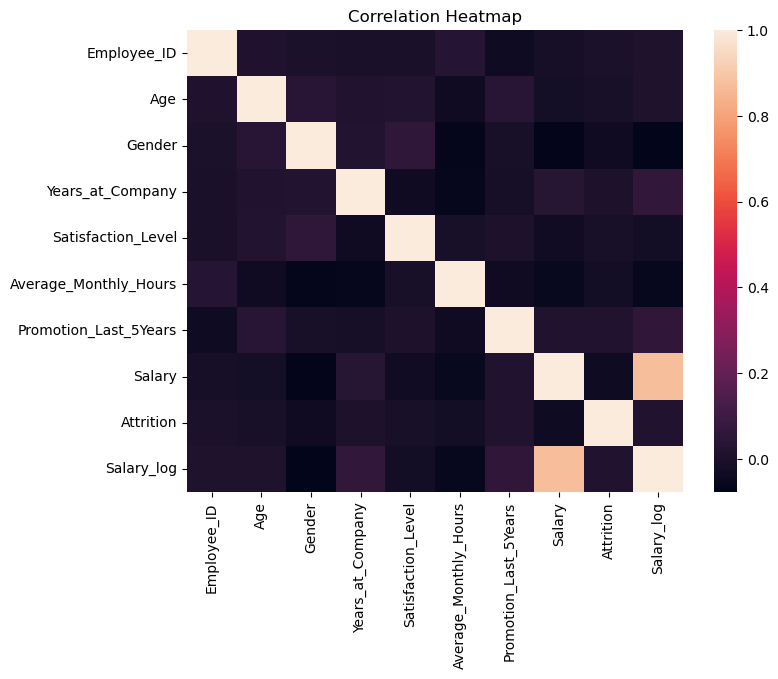

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=False)
plt.title('Correlation Heatmap')
plt.show()

#### PRACTICAL 14: Advanced Data Visualization

(a) Histogram

<Axes: >

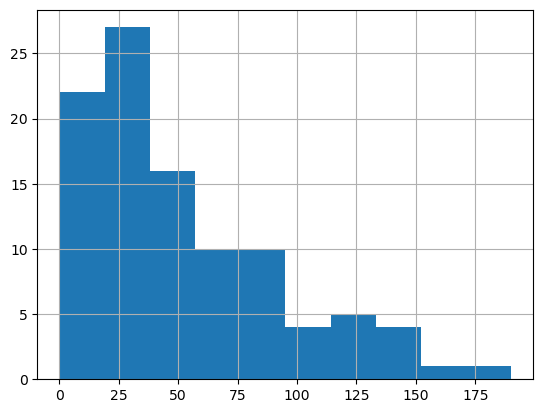

In [ ]:
df['Salary'].hist()


(b) Boxplot

<Axes: xlabel='Salary'>

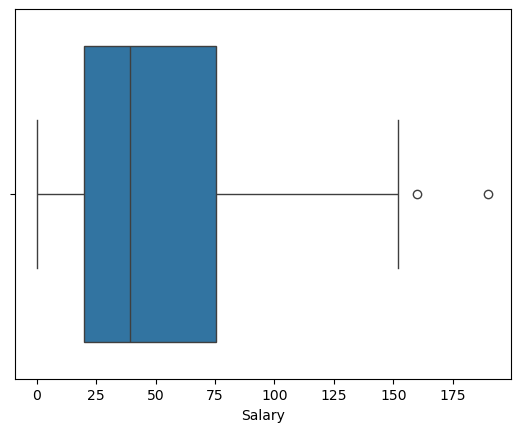

In [ ]:
sns.boxplot(x=df['Salary'])

(c) Pairplot

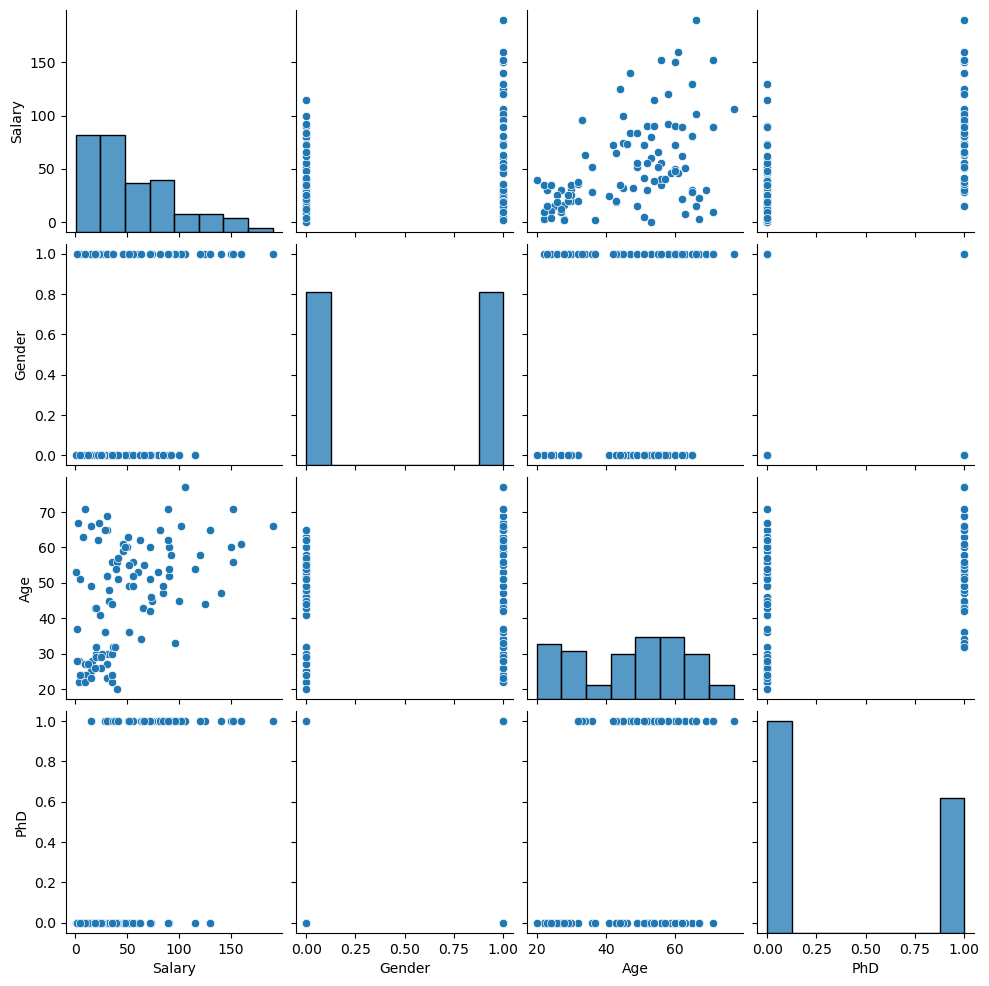

In [ ]:
sns.pairplot(df)